để chạy trên mail khác 

1 đâu tiên vào driver

2 Toạ một thư mực tên Colab Notebooks

3 vào mục được chia sẽ với tôi

4 Tạa lối tắc trên lối tắc thư mục QLXTM đen thuc mục Colab Notebooks vừa tạo

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!rm -rf "/content/drive/MyDrive/Colab Notebooks/QLXTM/number_label"

trên colab

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/'
!mkdir number_label
!unrar e number_label.rar ./number_label
path = '/content/drive/MyDrive/Colab Notebooks/QLXTM/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/QLXTM/'
/content

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal

Cannot open number_label.rar
No such file or directory
No files to extract


tren may

In [ ]:
%cd "D:/Hoc tap/cdio 397/QLXTM//ModelYoloQLXTM/"
path ="D:/Hoc tap/cdio 397/QLXTM//ModelYoloQLXTM/"

D:\Hoc tap\cdio 397\QLXTM\ModelYoloQLXTM


In [ ]:
import os

#tren colab
l = os.listdir("/content/number_label")

#tren may
# l = os.listdir(path +"number_label")

print(l)
print(len(l)-1)

file = open("number_label/ktbienso.csv",'w') 

for i in range(len(l)-2): #1 chua co file ktbienso.csv
  if len(l[i].split()[0])<=2 :
    label = l[i].split()[0] 
  else: 
    label = l[i].split('.')[0]
  file.write(l[i]+","+label+"\n")

file.close()


['ktbienso.csv']
0


In [ ]:
file = open("number_label/ktbienso.csv",'r') 
print(file.read())
file.close()

In [ ]:
!pwd
!cp -v number_label/ktbienso.csv ./

/content
'number_label/ktbienso.csv' -> './ktbienso.csv'


Train KT bien so

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2

In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/'

/content/drive/MyDrive/Colab Notebooks/QLXTM


In [ ]:
data = pd.read_csv("number_label/ktbienso.csv",header=None)
label=data.iloc[:,-1]
data=data.iloc[:,:-1]
print(label)
print(data)

EmptyDataError: ignored

In [ ]:
def get_data(data):
  l=[]
  file_img_path = "number_label/"
  for i in np.arange(data.shape[0]):
    path = data.iloc[i].values
    path = str(path).strip("\']")
    path = str(path).strip("[\'")
    print("read img: ",file_img_path+path)
    # Using 0 to read image in grayscale mode
    image = cv2.imread(file_img_path+path, 0)
    image_array=cv2.resize(image, (35,50))
    l.append(image_array)
  return l
l=get_data(data)
image_data= np.array(l)
print(image_data.shape)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
read img:  number_label/7 (642).jpg
read img:  number_label/7 (642).png
read img:  number_label/7 (643).jpg
read img:  number_label/7 (643).png
read img:  number_label/7 (644).jpg
read img:  number_label/7 (644).png
read img:  number_label/7 (645).jpg
read img:  number_label/7 (645).png
read img:  number_label/7 (646).jpg
read img:  number_label/7 (646).png
read img:  number_label/7 (647).jpg
read img:  number_label/7 (647).png
read img:  number_label/7 (648).jpg
read img:  number_label/7 (648).png
read img:  number_label/7 (649).jpg
read img:  number_label/7 (649).png
read img:  number_label/7 (65).jpg
read img:  number_label/7 (65).png
read img:  number_label/7 (650).jpg
read img:  number_label/7 (650).png
read img:  number_label/7 (651).jpg
read img:  number_label/7 (651).png
read img:  number_label/7 (652).jpg
read img:  number_label/7 (652).png
read img:  number_label/7 (653).jpg
read img:  number_label/7 (653).png
read img:

In [4]:
def tranform(src):
  srcTri = np.array( [[0, 0], [src.shape[1] - 1, 0], [0, src.shape[0] - 1]] ).astype(np.float32)
  dstTri = np.array( [[0, src.shape[1]*0.33], [src.shape[1]*0.85, src.shape[0]*0.25], [src.shape[1]*0.15, src.shape[0]*0.7]] ).astype(np.float32)
  warp_mat = cv2.getAffineTransform(srcTri, dstTri)
  warp_dst = cv2.warpAffine(src, warp_mat, (src.shape[1], src.shape[0]))
  # Rotating the image after Warp
  center = (warp_dst.shape[1]//2, warp_dst.shape[0]//2)
  angle = np.random.randint(-80,80,1)[0]
  scale = 0.9
  rot_mat = cv2.getRotationMatrix2D( center, angle, scale )
  warp_rotate_dst = cv2.warpAffine(warp_dst, rot_mat, (warp_dst.shape[1], warp_dst.shape[0]))
  return warp_rotate_dst

(87, 68)
(50, 35)


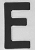

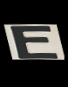

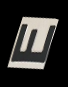

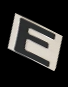

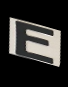

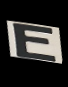

In [6]:
from google.colab.patches import cv2_imshow 
image=cv2.imread('test_img/e.png')

image_array=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_array.shape)
image_array=cv2.resize(image_array, (35,50))
print(image_array.shape)
cv2_imshow(image_array) 
for i in range(5):
    cv2_imshow(tranform(image))

In [ ]:
amount=5
l2=l.copy()
label2=list(np.copy(label))
for i in range(amount):
  for j in range(image_data.shape[0]):
    l2.append(tranform(image_data[j,:]))
    label2.append(label[j])
image_data2 = np.array(l2)
print(image_data2.shape[0])
print(len(label2))

487374
487374


In [ ]:
index = 487289
plt.imshow(image_data2[index], cmap = 'gray') 
print(label2[index])

In [ ]:
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

model = keras.Sequential()
model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv1', input_shape=(50, 35, 1)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv1'))
model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv2'))
model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv1'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv2'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))

model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv1'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv2'))
model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(36, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model = keras.models.load_model("ktbienso.onnx",)

In [ ]:
def Compression():
  !zip -ru ktbienso.zip ktbienso

In [ ]:
loop=5

for i in range(loop):
    print( str(i).center(50,'-'))

    amount=5
    l2=l.copy()
    label2=list(np.copy(label))
    for i in range(amount):
        for j in range(image_data.shape[0]):
            l2.append(tranform(image_data[j,:]))
            label2.append(label[j])
    image_data2 = np.array(l2)
    print(image_data2.shape[0])
    print(len(label2))

    label2=np.array(label2)
    X_train, X_test, y_train, y_test = train_test_split(image_data2, label2, test_size=0.2)
    print(X_train.shape)

    history = model.fit(X_train, y_train,batch_size=1000, epochs=10)
    model.save("ktbienso.onnx",)

    Compression() # tren colab

    print(X_test.shape)
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', test_acc)

    y_pred = model.predict(X_test)
    yy_pred=np.argmax(y_pred,axis=1)
    print(yy_pred)
    cm = confusion_matrix(y_test, yy_pred)
    print(cm)
    print(accuracy_score(y_test,yy_pred))

------------------------0-------------------------
487374
487374
(389899, 50, 35)
Epoch 1/10
390/390 [==============================] - 205s 513ms/step - loss: 6.4901 - accuracy: 0.1550
Epoch 2/10
390/390 [==============================] - 201s 516ms/step - loss: 0.4958 - accuracy: 0.8553
Epoch 3/10
390/390 [==============================] - 201s 516ms/step - loss: 0.2552 - accuracy: 0.9237
Epoch 4/10
390/390 [==============================] - 201s 516ms/step - loss: 0.1921 - accuracy: 0.9416
Epoch 5/10
390/390 [==============================] - 201s 516ms/step - loss: 0.1557 - accuracy: 0.9517
Epoch 6/10
390/390 [==============================] - 201s 517ms/step - loss: 0.1361 - accuracy: 0.9574
Epoch 7/10
390/390 [==============================] - 201s 517ms/step - loss: 0.1234 - accuracy: 0.9610
Epoch 8/10
390/390 [==============================] - 201s 516ms/step - loss: 0.1120 - accuracy: 0.9644
Epoch 9/10
390/390 [==============================] - 201s 516ms/step - loss: 0.1076 -

	zip warning: ktbienso.zip not found or empty
(97475, 50, 35)
3047/3047 [==============================] - 32s 10ms/step - loss: 0.1367 - accuracy: 0.9585
Test accuracy: 0.9585124254226685
3047/3047 [==============================] - 26s 9ms/step
[ 1 32 27 ... 25  7 20]
[[2217    0    0 ...    0    0    0]
 [   0 2456    1 ...    0    0    0]
 [   0   13 2378 ...    1    0    8]
 ...
 [   0    2    0 ... 2479    0    7]
 [   0    2    0 ...   11 2442    3]
 [   0   19    6 ...    1    0 2289]]
0.9585124390869454
------------------------1-------------------------
487374
487374
(389899, 50, 35)
Epoch 1/10
390/390 [==============================] - 199s 511ms/step - loss: 0.1204 - accuracy: 0.9627
Epoch 2/10
390/390 [==============================] - 201s 516ms/step - loss: 0.1034 - accuracy: 0.9674
Epoch 3/10
390/390 [==============================] - 201s 515ms/step - loss: 0.0948 - accuracy: 0.9699
Epoch 4/10
390/390 [==============================] - 201s 516ms/step - loss: 0.0909 - a

	zip warning: ktbienso.zip not found or empty
(97475, 50, 35)
3047/3047 [==============================] - 31s 10ms/step - loss: 0.1182 - accuracy: 0.9662
Test accuracy: 0.9662272334098816
3047/3047 [==============================] - 27s 9ms/step
[30 28 19 ... 13 29  5]
[[2247    0    0 ...    0    0    0]
 [   0 2376    0 ...    0    1    3]
 [   0    0 2501 ...    0    0   33]
 ...
 [   0    0    0 ... 2522    3    5]
 [   0    0    0 ...    4 2523    2]
 [   0    1   12 ...    1    0 2187]]
0.96622723775327
------------------------2-------------------------
487374
487374
(389899, 50, 35)
Epoch 1/10
390/390 [==============================] - 201s 514ms/step - loss: 0.1034 - accuracy: 0.9687
Epoch 2/10
390/390 [==============================] - 200s 513ms/step - loss: 0.0915 - accuracy: 0.9720
Epoch 3/10
390/390 [==============================] - 200s 513ms/step - loss: 0.0876 - accuracy: 0.9732
Epoch 4/10
390/390 [==============================] - 200s 512ms/step - loss: 0.0799 - acc

	zip warning: ktbienso.zip not found or empty
(97475, 50, 35)
3047/3047 [==============================] - 31s 10ms/step - loss: 0.1061 - accuracy: 0.9718
Test accuracy: 0.9718286991119385
3047/3047 [==============================] - 27s 9ms/step
[18 17 12 ... 29 18 10]
[[2295    3    0 ...    0    0    0]
 [   0 2506    3 ...    0    0    1]
 [   0    2 2569 ...    0    0    5]
 ...
 [   0    0    0 ... 2582    2    7]
 [   0    2    3 ...    4 2486    2]
 [   0    3    8 ...    2    0 2182]]
0.9718286740189792
------------------------3-------------------------
487374
487374
(389899, 50, 35)
Epoch 1/10
390/390 [==============================] - 199s 510ms/step - loss: 0.0946 - accuracy: 0.9729
Epoch 2/10
390/390 [==============================] - 198s 508ms/step - loss: 0.0830 - accuracy: 0.9759
Epoch 3/10
390/390 [==============================] - 198s 508ms/step - loss: 0.0740 - accuracy: 0.9778
Epoch 4/10
390/390 [==============================] - 198s 507ms/step - loss: 0.0741 - a

	zip warning: ktbienso.zip not found or empty
(97475, 50, 35)
3047/3047 [==============================] - 31s 10ms/step - loss: 0.1017 - accuracy: 0.9734
Test accuracy: 0.9734188318252563
3047/3047 [==============================] - 27s 9ms/step
[21 11 17 ... 30 14 31]
[[2386    1    0 ...    0    0    0]
 [   0 2522    0 ...    2    2    4]
 [   0    2 2556 ...    0    0    3]
 ...
 [   0    0    1 ... 2561    1    6]
 [   0    0    0 ...    2 2619    0]
 [   0    0   21 ...    2    2 2266]]
0.9734188253398307
------------------------4-------------------------
487374
487374
(389899, 50, 35)
Epoch 1/10
390/390 [==============================] - 198s 508ms/step - loss: 0.0887 - accuracy: 0.9750
Epoch 2/10
390/390 [==============================] - 198s 507ms/step - loss: 0.0741 - accuracy: 0.9787
Epoch 3/10
390/390 [==============================] - 198s 507ms/step - loss: 0.0749 - accuracy: 0.9786
Epoch 4/10
390/390 [==============================] - 198s 507ms/step - loss: 0.0725 - a

	zip warning: ktbienso.zip not found or empty
(97475, 50, 35)
3047/3047 [==============================] - 31s 10ms/step - loss: 0.0958 - accuracy: 0.9757
Test accuracy: 0.9756553173065186
3047/3047 [==============================] - 27s 9ms/step
[ 7  8 26 ... 26 18 14]
[[2495    0    0 ...    0    0    0]
 [   1 2541    0 ...    3    0    1]
 [   0    2 2564 ...    0    0    5]
 ...
 [   0    0    0 ... 2541    0    4]
 [   0    0    0 ...    2 2541    0]
 [   1    1    6 ...    3    1 2264]]
0.9756552962298025


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/'
!cp -rfv '/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso' '/content/drive/MyDrive/'

/content/drive/.shortcut-targets-by-id/1tiBC4N1D1C498rbABPQykfd5C6v__ORb/Colab Notebooks/QLXTM
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso' -> '/content/drive/MyDrive/ktbienso'
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso/variables' -> '/content/drive/MyDrive/ktbienso/variables'
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso/variables/variables.index' -> '/content/drive/MyDrive/ktbienso/variables/variables.index'
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/ktbienso/variables/variables.data-00000-of-00001'
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso/assets' -> '/content/drive/MyDrive/ktbienso/assets'
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso/keras_metadata.pb' -> '/content/drive/MyDrive/ktbienso/keras_metadata.pb'
'/content/drive/MyDrive/Colab Notebooks/QLXTM/ktbienso/fingerprint.pb' -> '/content/drive/MyDrive/ktbienso/fingerprint.pb'
'/content/drive/MyDriv

!!!load model tai day!!!!

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/'

/content/drive/.shortcut-targets-by-id/1tiBC4N1D1C498rbABPQykfd5C6v__ORb/Colab Notebooks/QLXTM


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2

In [ ]:
model = keras.models.load_model("ktbienso.onnx",)

In [ ]:
label_str ="0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z"
img_label=np.array(label_str.split())
print(len(img_label),'\n',img_label) 

36 
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


(87, 68)
(50, 35)
1/1 [==============================] - 0s 462ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.2662627e-35 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.2059641e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
14
E


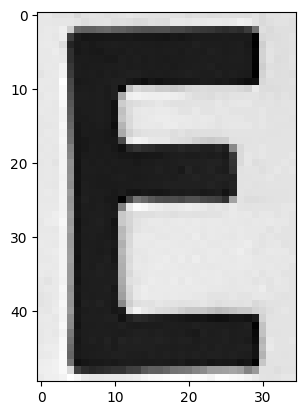

In [ ]:
import cv2
from PIL import Image
image = Image.open('test_img/e.png')
image_array = np.asarray(image)
image_array=cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
print(image_array.shape)
image_array=cv2.resize(image_array, (35,50))
print(image_array.shape)
plt.imshow(image_array, cmap = 'gray') 
prep = model.predict(image_array.reshape(1,50,35,1))
print(prep)
print(np.argmax(prep))
print(img_label[np.argmax(prep)])

tf to onnx

In [ ]:
!pip install tf2onnx
!pip install onnxruntime
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/'

/content/drive/.shortcut-targets-by-id/1tiBC4N1D1C498rbABPQykfd5C6v__ORb/Colab Notebooks/QLXTM


In [ ]:
model = keras.models.load_model("ktbienso.onnx",)

In [ ]:
import tf2onnx
import onnxruntime as ort
import onnx

In [ ]:
onnx_model, _ = tf2onnx.convert.from_keras(model)

In [ ]:
onnx.save(onnx_model, "ktbienso.onnx")

(87, 68)
(50, 35)
[array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        4.2663282e-35, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.2059641e-29, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)]
14
E


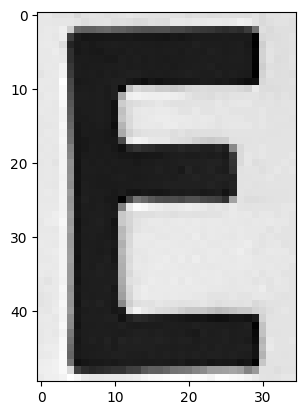

In [ ]:
import cv2
from PIL import Image

sess = ort.InferenceSession("ktbienso.onnx", providers=["CUDAExecutionProvider","CPUExecutionProvider"])

input_name= "block1_conv1_input"
output_name="dense_5"

image = Image.open('test_img/e.png')
image_array = np.asarray(image)
image_array=cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
print(image_array.shape)
image_array=cv2.resize(image_array, (35,50))
print(image_array.shape)
plt.imshow(image_array, cmap = 'gray') 
input=image_array.reshape(1,50,35,1).astype(np.float32)

prep = sess.run([output_name], {input_name: input})
print(prep)
print(np.argmax(prep))
print(img_label[np.argmax(prep)])

Test tren may

In [ ]:
import torch
print(torch.cuda.is_available())

True


Yolo v8

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.8/486.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 21.2 MB/s eta 0:00:00


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8'

/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8


In [ ]:
# Khai báo 1 file yaml để YOLOv7 biết:
# - Đường dẫn đến thư mục train, test (nếu có, nếu không thì dùng luôn đường dẫn đến train)
# - Số lượng class qua biến nc (number of class)
# - Tên của các class
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8'
#!rm data/dataset.yaml # nếu có

!echo 'path: ../dataset/' > dataset.yaml
!echo 'train: train/images/' >> dataset.yaml
!echo 'val: train/images/' >> dataset.yaml
!echo 'test:' >> dataset.yaml
!echo -e "names: \n 0: Bien so" >> dataset.yaml


/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8


Train model

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8'
from ultralytics import YOLO

model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Use the model
model.train(data="dataset.yaml" ,epochs=100)  # train the model
metrics = model.val()  # evaluate model performance on the validation set



/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8'
!cp -v ./runs/detect/train/weights/*.pt ./

/content/drive/.shortcut-targets-by-id/1tiBC4N1D1C498rbABPQykfd5C6v__ORb/Colab Notebooks/QLXTM/yolov8
'./runs/detect/train/weights/best.pt' -> './best.pt'
'./runs/detect/train/weights/last.pt' -> './last.pt'


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/QLXTM/yolov8'
from ultralytics import YOLO

model = YOLO('best.pt')  # build from YAML and transfer weights

# Use the model
model.train(data="dataset.yaml" ,epochs=100)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

/content/drive/.shortcut-targets-by-id/1tiBC4N1D1C498rbABPQykfd5C6v__ORb/Colab Notebooks/QLXTM/yolov8


Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=best.pt, data=dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

  0%|          | 0.00/755k [00:00<?, ?B/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

test model trên may

In [ ]:
!pip install pytesseract

test tach so bang opencv

In [ ]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
import argparse

# #construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, 
# 	help="path to input image")
# ap.add_argument("-c", "--connectivity", type=int, default=4,
# 	help="connectivity for connected component analysis")
# args = vars(ap.parse_args())

class ImgToCharByORC:
    def __init__(self,path = "C:/Program Files/Tesseract-OCR/tesseract.exe"):
        self.path = path
        pass
    # get grayscale image
    def get_grayscale(self,image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # noise removal
    def remove_noise(self,image):
        return cv2.medianBlur(image,5)
    
    #Gaussian filtering
    def gaussian_filter(self,img):
        return cv2.GaussianBlur(img,(5,5),0)

    #thresholding
    def thresholding(self,image):
        return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    #thresholding inv
    def thresholding_inv(self,image):
        return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    #adaptiveThreshold
    def adaptiveThreshold(self,image):
        return cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

    #dilation
    def dilate(self,image):
        kernel = np.ones((5,5),np.uint8)
        return cv2.dilate(image, kernel, iterations = 1)
        
    #erosion
    def erode(self,image):
        kernel = np.ones((5,5),np.uint8)
        return cv2.erode(image, kernel, iterations = 1)

    #opening - erosion followed by dilation
    def opening(self,image):
        kernel = np.ones((5,5),np.uint8)
        return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    #canny edge detection
    def canny(self,image):
        return cv2.Canny(image, 100, 200)

    #skew correction
    def deskew(self,image):
        coords = np.column_stack(np.where(image > 0))
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        return rotated

    #template matching
    def match_template(self,image, template):
        return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 
    def ToStr(self,image):
        pytesseract.pytesseract.tesseract_cmd=self.path
        # Adding custom options
        custom_config = r'--oem 3 --psm 11'
        return pytesseract.image_to_string(image=image, config=custom_config)

numLabels 12
labels [[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]
stats [[    3     0   297   300 61350]
 [    0     0    11   300  1874]
 [  283     0    17   300  2967]
 [   89    17    36   130  2982]
 [   41    18    36   130  3049]
 [  223    18    37   129  2104]
 [  176    20    37   126  3361]
 [  141    75    16    17   232]
 [  214   165    37   133  3454]
 [   44   166    37   127  2216]
 [  100   167    37   128  3265]
 [  158   167    37   128  3146]]
centroids [[146.85414833 146.77083945]
 [  2.77588047 165.03094984]
 [294.34782609 150.9322548 ]
 [107.48457411  79.53353454]
 [ 60.00524762  80.67464743]
 [240.98336502  71.90731939]
 [194.08539125  82.42606367]
 [148.20258621  82.85344828]
 [231.95107122 230.64302258]
 [ 61.38944043 216.91155235]
 [117.84563553 231.11822358]
 [174.12396694 232.33057851]]


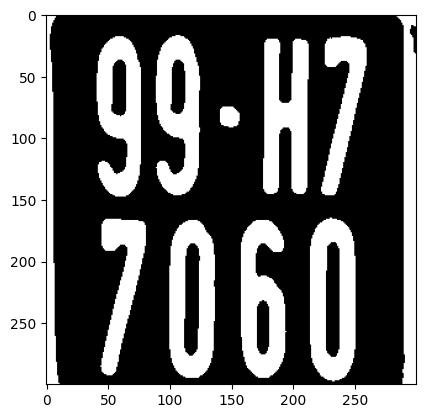

In [ ]:
import matplotlib.pyplot as plt
import cv2 
image = cv2.imread('test_img/bs.jpg')
image = cv2.resize(image, (300, 300))
orc=ImgToCharByORC()
gray = orc.get_grayscale(image)
gray =orc.remove_noise(gray)
gaus = orc.gaussian_filter(gray)
thres_inv = orc.thresholding_inv(gaus)


plt.imshow(thres_inv, cmap="gray")


connectivity = 4 #4 or 8

output = cv2.connectedComponentsWithStats(
	thres_inv, connectivity , cv2.CV_32S) 
(numLabels, labels, stats, centroids) = output

print("numLabels",numLabels)
print("labels",labels)
print("stats",stats)
print("centroids",centroids)

In [ ]:
# loop over the number of unique connected component labels
x,y,w,h,cX,cY=0,0,0,0,0,0
image_copy = image.copy()
for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]
	
	# clone our original image (so we can draw on it) and then draw
	# a bounding box surrounding the connected component along with
	# a circle corresponding to the centroid

	cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv2.circle(image_copy, (int(cX), int(cY)), 4, (0, 0, 255), -1)


[INFO] examining component 1/12 (background)
[INFO] examining component 2/12
[INFO] examining component 3/12
[INFO] examining component 4/12
[INFO] examining component 5/12
[INFO] examining component 6/12
[INFO] examining component 7/12
[INFO] examining component 8/12
[INFO] examining component 9/12
[INFO] examining component 10/12
[INFO] examining component 11/12
[INFO] examining component 12/12


In [ ]:
# construct a mask for the current connected component by
# finding a pixels in the labels array that have the current
# connected component ID
componentMask = (labels == 1).astype("uint8") * 255
# show connected component mask
cv2.imshow("Connected Component "+str(i), componentMask)
#show output image 
cv2.imshow("Output", image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(gray.shape, dtype="uint8")

# loop over the number of unique connected component labels, skipping
# over the first label (as label zero is the background)
x,y,w,h,cX,cY=0,0,0,0,0,0
image_copy = image.copy()
for i in range(1, numLabels):
	# extract the connected component statistics for the current
	# label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]

	# ensure the width, height, and area are all neither too small
	# nor too big
	keepWidth = w >= 20 and w <= 80
	keepHeight = h >= 20 and h < 200
	keepArea = area >= 1000 and area <= 4000
	# ensure the connected component we are examining passes all
	# three tests
	if all((keepWidth, keepHeight, keepArea)):
		# construct a mask for the current connected component and
		# then take the bitwise OR with the mask
		print("[INFO] keeping connected component '{}'".format(i))
		componentMask = (labels == i).astype("uint8") * 255
		mask = cv2.bitwise_or(mask, componentMask)
	# clone our original image (so we can draw on it) and then draw
	# a bounding box surrounding the connected component along with
	# a circle corresponding to the centroid
	
# show the original input image and the mask for the license plate
# characters
cv2.imshow("Image", image)
cv2.imshow("Characters", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# test_imag= 'yolov8/dataset/train/images/AQUA2_79330_checkin_2020-10-31-14-217vJBYg0EAZ.jpg'
test_imag = "test_img/xe10.jpg"
yolo_path = "yolov8/bienso/best.pt"
predict=YoloPredict(yolo_path,detail=False,cnn=True,ocr=False,gpu_ocr=True)

image=cv2.imread(test_imag)
pred_img,license_plate,license_plate_img= predict.Predict(image)
if len(license_plate)>0:
    font = cv2.FONT_HERSHEY_SIMPLEX
    # org
    org = (50, 50)
    # fontScale
    fontScale = 1
    # Blue color in BGR
    color = (255, 0, 0)
    # Line thickness of 2 px
    thickness = 2
    # Using cv2.putText() method
    image = cv2.putText(pred_img, " - ".join(license_plate), org, font, 
               fontScale, color, thickness, cv2.LINE_AA)
cv2.imshow("test_img",pred_img),
for i in range(len(license_plate_img)):
    cv2.imshow("license_plate "+str(i),license_plate_img[i])
cv2.waitKey(0)
cv2.destroyAllWindows()


d:\Hoc tap\cdio 397\QLXTM\ModelYoloQLXTM\QLXTMenv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'DmlExecutionProvider, CPUExecutionProvider'
  warnings.warn(

0: 640x544 1 Bien so, 193.5ms
Speed: 2.0ms preprocess, 193.5ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
from ultralytics import YOLO
import cv2

# video_path = "D:/Hoc tap/cdio 397/QLXTM/ModelYoloQLXTM/video_test/bike_counter_10min.mp4"
video_path = "video_test/vt3.mp4"

# test_imag= 'yolov8/dataset/train/images/AQUA2_79330_checkin_2020-10-31-14-217vJBYg0EAZ.jpg'
test_imag = "test_img/xe12.jpg"
yolo_path = "yolov8/bienso/best.pt"
predict=YoloPredict(yolo_path,detail=False,accuracy=0.85,cnn=True,ocr=True,gpu_ocr=True)


model = YOLO(yolo_path)
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    scale_percent = 60 # percent of original size
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    frame = cv2.resize(frame, dim)
    
    pred_img,license_plate,license_plate_img= predict.Predict(frame)
    if len(license_plate)>0:
        font = cv2.FONT_HERSHEY_SIMPLEX
        # org
        org = (50, 50)
        # fontScale
        fontScale = 1
        # Blue color in BGR
        color = (255, 0, 0)
        # Line thickness of 2 px
        thickness = 2
        # Using cv2.putText() method
        image = cv2.putText(pred_img, ' - '.join(license_plate), org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow('video test', pred_img)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

d:\Hoc tap\cdio 397\QLXTM\ModelYoloQLXTM\QLXTMenv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'DmlExecutionProvider, CPUExecutionProvider'
  warnings.warn(

0: 384x640 (no detections), 38.4ms
Speed: 1.0ms preprocess, 38.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 40.2ms
Speed: 2.0ms preprocess, 40.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 42.0ms
Speed: 1.0ms preprocess, 42.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 37.0ms
Speed: 1.0ms preprocess, 37.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 31.0ms
Speed: 1.0ms preprocess, 31.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 31.0ms


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import tensorflow as tf
import easyocr
import onnxruntime as ort

class SpiltCharacter():
    def __init__(self, image,detail=True, connectivity=4,frame_crop=0):
        self.image = image
        self.detail =detail
        self.connectivity = connectivity  # 4 or 8
        self.frame_crop = frame_crop

    # get grayscale image
    def get_grayscale(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # noise removal
    def remove_noise(self, image):
        return cv2.medianBlur(image, 5)

    # Gaussian filtering
    def gaussian_filter(self, img):
        return cv2.GaussianBlur(img, (5, 5), 0)

    # thresholding inv
    def thresholding_inv(self, image):
        return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    def Connected(self, thres_inv):
        return cv2.connectedComponentsWithStats(thres_inv, self.connectivity, cv2.CV_32S)

    def Sort_stats_for_y(self,stats):
        min_y= np.min(stats[:,1])
        min_y*=3

        #bien 1 dong
        if np.sum(stats[:,1]>min_y)>5:
            for i in range(len(stats)-1):
                for j in range(i+1,len(stats)):
                    if stats[i,0] > stats[j,0]:
                        stats[[i,j],:] = stats[[j,i],:]        
        else:   # bien 2 dong
            for i in range(len(stats)-1):
                for j in range(i+1,len(stats)):
                    if stats[i,1] <= min_y and stats[j,1] <=min_y:
                        if stats[i,0] > stats[j,0]:
                            stats[[i,j],:] = stats[[j,i],:]
                    elif stats[i,1] > min_y and stats[j,1] > min_y:
                        if stats[i,0] > stats[j,0]:
                            stats[[i,j],:] = stats[[j,i],:]
        return stats
    def Split(self, wl =[20,200], hl=[20,200], areal=[500,4000]):
        gay = self.get_grayscale(self.image)
        remove_noise = self.remove_noise(gay)
        gaus = self.gaussian_filter(remove_noise)
        thresh_inv = self.thresholding_inv(gaus)
        (numLabels, labels, stats, centroids) = self.Connected(thresh_inv)
        # loop over the number of unique connected component labels, skipping
        # over the first label (as label zero is the background)
        # stats=self.Sort_stats_for_y(stats)
        stats_sort =[]
        image_split=[]
        for i in range(1, numLabels):
            # extract the connected component statistics for the current
            # label
            x = stats[i, cv2.CC_STAT_LEFT]
            y = stats[i, cv2.CC_STAT_TOP]
            w = stats[i, cv2.CC_STAT_WIDTH]
            h = stats[i, cv2.CC_STAT_HEIGHT]
            area = stats[i, cv2.CC_STAT_AREA]
            (cX, cY) = centroids[i]

            # ensure the width, height, and area are all neither too small
            # nor too big
            keepWidth =  w >= wl[0] and w <= wl[1]
            keepHeight = h >= hl[0] and h <= hl[1]
            keepArea = area >= areal[0] and area <= areal[1]
            # ensure the connected component we are examining passes all
            # three tests
            if all((keepWidth, keepHeight, keepArea)):
                # construct a mask for the current connected component and
                # then take the bitwise OR with the mask
                #print("[INFO] keeping connected component '{}'".format(i))
                #componentMask = (labels == i).astype("uint8") * 255
                #mask = cv2.bitwise_or(mask, componentMask)
                stats_sort.append(stats[i,:])
        if len(stats_sort) == 0 :return []
        stats_sort=self.Sort_stats_for_y(np.array(stats_sort))
        if self.detail:
            print(stats) 
            print(stats_sort) 
        for i in range(stats_sort.shape[0]):
            x = stats_sort[i, cv2.CC_STAT_LEFT]
            y = stats_sort[i, cv2.CC_STAT_TOP]
            w = stats_sort[i, cv2.CC_STAT_WIDTH]
            h = stats_sort[i, cv2.CC_STAT_HEIGHT]
            area = stats_sort[i, cv2.CC_STAT_AREA]
            image_split.append(self.image[y-self.frame_crop:y+h+self.frame_crop,x-self.frame_crop:x+w+self.frame_crop])
        return image_split

class PredictChacracterByCNN:
    def __init__(self,path="ktbienso.onnx",):
        self.model_character =  ort.InferenceSession("ktbienso.onnx", providers=["CUDAExecutionProvider","CPUExecutionProvider"])
        self.image_label= np.array("0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z".split())
    def Predict(self,image):
        input_name= "block1_conv1_input"
        output_name="dense_5"
        image_resize=cv2.resize(image, (35,50))
        image_gray=cv2.cvtColor(image_resize, cv2.COLOR_BGR2GRAY)
        image_array = np.asarray(image_gray)
        prep = self.model_character.run([output_name], {input_name:image_array.reshape(1,50,35,1).astype(np.float32)})
        return self.image_label[np.argmax(prep)]
    def PredictListImage(self,list_image):
        pred_str=''
        for i in list_image:
            pred_str+=self.Predict(i)
        return pred_str

class PredictChacracterByPytesserac:
    def __init__(self,path = "C:/Program Files/Tesseract-OCR/tesseract.exe"):
        self.path = path
    
    def Predict(self,image,ome =3 ,psm =6,lang='eng'):
        # image_resize=cv2.resize(image, (50,35))
        image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        remove_noise = cv2.medianBlur(image_gray, 5)
        gaus = cv2.GaussianBlur(remove_noise, (5, 5), 0)
        thres_inv=cv2.threshold(gaus, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        pytesseract.pytesseract.tesseract_cmd=self.path
        # Adding custom options
        custom_config = r'--oem '+str(ome) +' --psm '+str(psm) +' -c tessedit_char_whitelist=0123456789ABCDEFHIJKLMNPQRSTUVWXYZG'
        return pytesseract.image_to_string(image=thres_inv, config=custom_config,lang=lang)
    def PredictListImage(self,list_image,ome =3 ,psm =6):
        pred_str=''
        for i in list_image:
            pred_str+=self.Predict(i,ome=ome,psm=psm)
        return pred_str

class PredictChacracterByEasyocr:
    def __init__(self,lang = ['en'],gpu=True):
        self.reader = easyocr.Reader(lang,gpu=gpu)
    
    def Predict(self,image,ome =3 ,psm =6):
        # image_resize=cv2.resize(image, (50,35))
        image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        result = self.reader.readtext(image_gray,detail = 0)
        if len(result) > 0: return result[0]
        else: return ""
    def PredictListImage(self,list_image):
        pred_str=''
        for i in list_image:
            pred_str+=self.Predict(i)
        return pred_str
    
class YoloPredict:
    def __init__(self, yolo_path="yolov8/bienso/best.pt", detail=True,accuracy=0.8, cnn=True, ocr=False, gpu_ocr=True):
        self.model_yolo = YOLO(yolo_path)
        self.preddict_cnn = PredictChacracterByCNN("ktbienso.onnx",)
        self.preddict_ocr = PredictChacracterByEasyocr(['en'],gpu=gpu_ocr)
        self.cnn = cnn
        self.ocr = ocr
        self.detail = detail
        self.accuracy=accuracy
    def Predict(self, image):
        results = self.model_yolo(image)  # predict on an image
        result = results[0]
        boxes = result.boxes  # Boxes object for bbox outputs
        name_str = result.names[0]
        license_plate = []
        license_plate_img = []
        for i in np.arange(len(boxes.boxes)):
            if boxes.boxes[i,-2] >= self.accuracy:
                xy = np.array(torch.Tensor.cpu(boxes.xyxy[i, 0:2])).astype(int)
                xy2 = np.array(torch.Tensor.cpu(boxes.xyxy[i, 2:4])).astype(int)
                crop_img = image[xy[1]:xy2[1], xy[0]:xy2[0]]
                crop_img_resize = cv2.resize(crop_img, (300, 300))
                license_plate_img.append(crop_img_resize)
                split = SpiltCharacter(crop_img_resize,self.detail,frame_crop=10)
                image_split = split.Split(wl=[10, 300], hl=[50, 300], areal=[500, 4000])
                if len(image_split) == 0:
                    continue
                if self.cnn :
                    license_plate.append(self.preddict_cnn.PredictListImage(image_split))
                if self.ocr :
                    license_plate.append(self.preddict_ocr.PredictListImage(image_split))
        return results[0].plot(), license_plate,license_plate_img
